# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом по классификации emoji из тг. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 100 классов и около 100 картинок на каждый класс. Классы пронумерованы, кодом смайлика к которому относятся элементы класса. Скачать датасет можно вот [тут](https://disk.yandex.ru/d/elNF0DS94o2GVA).

Структура датасета -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.24**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.34**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе.

Good luck & have fun! :)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install wandb
# !pip3 install pytorch_lightning torchmetrics

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [158]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm

# You may add any imports you need

from pytorch_lightning import seed_everything

In [ ]:
def my_seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# буду использовать готовую функцию из pl, так как она вроде работает лучше...
seed_everything(123456)

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать свою модель руками в классе YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
# !cp -r /content/drive/MyDrive/dataset/ /content
# !unzip dataset/dataset/train.zip -d dataset/dataset
# !unzip /content/dataset/dataset/val.zip -d dataset/dataset

Нормализацию я взял как в ImageNet, остальное с семинара

In [183]:
seed_everything(123456, workers=True)
train_transform = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(30),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

val_transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

train_dataset = ImageFolder('dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('dataset/dataset/val', transform=val_transform)


train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, persistent_workers=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, persistent_workers=True)

INFO:lightning_fabric.utilities.seed:Seed set to 123456


In [177]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10.7 µs


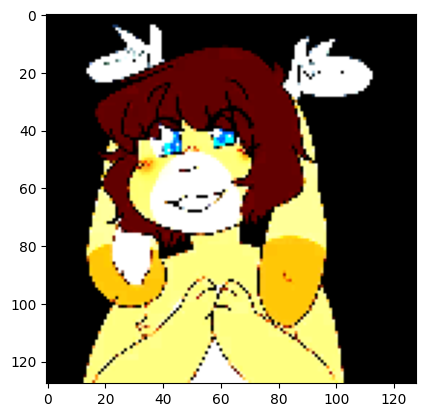

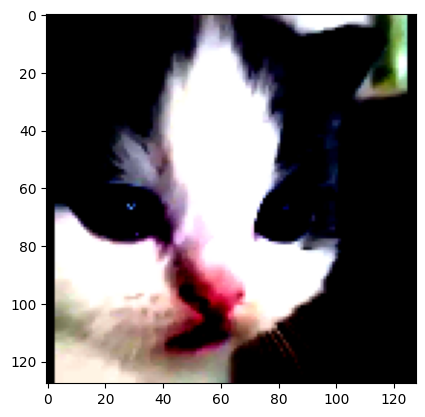

In [178]:
%time
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.4. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте не предобученную)

### Тренировочный класс lightning

In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR
from torchmetrics.functional import accuracy as torch_accuracy
from torchvision.models import resnet18

# Большая часть класса скопирована с семинара, но пришлось дописать _forward и get_accuracy, чтобы работала функция проверки
class MyModule(pl.LightningModule):
    def __init__(self,
                 learning_rate,
                 train_dataloader,
                 val_dataloader,
                 train_full_network=False,
                 model=resnet18(weights=None)
                ):

        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

        self.train_dataloader_instance = train_dataloader
        self.val_dataloader_instance = val_dataloader
        self.train_full_network = train_full_network


        self.model.fc = nn.Linear(self.model.fc.in_features, 100)
        self.optimizer = torch.optim.AdamW(self.model.parameters(), lr=self.learning_rate, weight_decay=0.001)
        self.scheduler = CosineAnnealingLR(self.optimizer, T_max=20)
        self.loss = nn.CrossEntropyLoss()

        self.total_acc = 0
        self.total_samples = 0

    def _forward(self, x):
        preds = self.model(x)
        return preds

    def forward(self, images, target=None):
        preds = self._forward(images)

        if target is not None:
            self.total_acc += torch_accuracy(preds, target, task='multiclass', num_classes=100)
            self.total_samples += 1

            loss = self.loss(preds, target)
            return loss
        return preds

    def get_accuracy(self, reset=False):
        # считаем среднее accuracy за self.total_samples вызовов forward
        acc = self.total_acc / self.total_samples if self.total_samples > 0 else 0.0

        if reset:
            self.total_acc = 0
            self.total_samples = 0
        return acc.cpu()

    def configure_optimizers(self):
        return {
            'optimizer': self.optimizer,
            'lr_scheduler': {
                'scheduler': self.scheduler,
                'interval': 'epoch',
                'frequency': 1
            }
        }

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self._forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self._forward(images)
        loss = self.loss(preds, target)

        acc = torch_accuracy(preds, target, task='multiclass', num_classes=100)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

    def train_dataloader(self):
        return self.train_dataloader_instance

    def val_dataloader(self):
        return self.val_dataloader_instance

    def freeze_base_layers(self):
        '''
        Замораживаем все параметры кроме последнего слоя
        '''
        for param in self.model.parameters():
            param.requires_grad = False
        for param in self.model.fc.parameters():
            param.requires_grad = True

    def unfreeze_all_layers(self):
        '''
        Включаем обучение всех параметров
        '''
        for param in self.model.parameters():
            param.requires_grad = True

Будем обучать сначала последний слой на 3 эпохах, потом всю сетку. Увидел эту идею в чате тг от одного из семинаристов, решил попробовать.


In [185]:
# if wandb:
#     wandb.finish()

wandb_logger = WandbLogger(log_model='all')

device = "cuda" if torch.cuda.is_available() else "cpu"

# будем использовать resnet18 без претрейна
model = resnet18(weights=None).to(device)
module = MyModule(model=model, learning_rate=0.001, train_dataloader=train_dataloader, val_dataloader=val_dataloader)

# заморозим все слои кроме головы
module.freeze_base_layers()

# обучаем последний слой
trainer = pl.Trainer(logger=wandb_logger, max_epochs=3)
trainer.fit(module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | ResNet           | 11.2 M | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
51.3 K    Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.911    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [ ]:
# обучаем всю сеть
module.unfreeze_all_layers()
module.train_full_network = True

trainer = pl.Trainer(logger=wandb_logger, max_epochs=16)
print(module.learning_rate)
trainer.fit(module)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params | Mode 
---------------------------------------------------
0 | model | ResNet           | 11.2 M | train
1 | loss  | CrossEntropyLoss | 0      | train
---------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.911    Total estimated model params size (MB)
69        Modules in train mode
0         Modules in eval mode


0.001


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=16` reached.


### Валидация результатов задания

In [187]:
# from torchmetrics.functional import accuracy as torch_accuracy
from tqdm import tqdm
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

Модель в принципе всегда выбивает 0.24, если поучить ее, но это долго(также еще сильно влияет рандом, random_seed плохо работает, всегда получаются разные результаты), поэтому будем копировать с wandb лучшую модель из artifacts. Нужно ввести ключ api, подойдет любой с сервиса.

Вот ссылка на wandb c этой моделью: https://wandb.ai/raykov0417-higher-school-of-economics/lightning_logs/runs/lhatiicr?nw=nwuserraykov0417

In [188]:
# копируем нашу модель из wandb

import wandb
run = wandb.init()
artifact = run.use_artifact('raykov0417-higher-school-of-economics/lightning_logs/best_first_task_0-258:v17', type='model')
artifact_dir = artifact.download()

accuracy,▃▁▃▃▁▃▃▂▃▃▃▃▃▄▄▄▄▅▅▆▆▇▇▇█████
epoch,▁▁▁▁▁▂▁▁▁▁▁▁▁▁▂▂▂▁▁▁▁▁▂▂▂▃▃▄▄▅▅▅▆▆▆▇▇▇██
train_loss,▇█▅▆▆▇▇█▆▆▅▇▇▆▆▇█▇▆▅▅▄█▆▆▆▅▅▅▄▅▅▂▁▃▂▃▁▃▃
trainer/global_step,▁▁▁▂▂▂▁▂▂▁▂▂▂▂▂▁▁▁▁▂▂▂▂▂▃▃▄▄▄▄▄▄▄▅▆▇▇▇██
val_loss,██▇█████▇▇█▇█▆▆▅▄▃▃▂▂▁▁▁▁▁▁▁▁
accuracy,0.24
epoch,15
train_loss,2.27594
trainer/global_step,22815
val_loss,3.22932


wandb: Downloading large artifact best_first_task_0-258:v17, 134.75MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5


In [189]:

checkpoint_path = f"{artifact_dir}/model.ckpt"
loaded_model = MyModule.load_from_checkpoint(checkpoint_path)

accuracy = evaluate_task(loaded_model, val_dataloader)
print(f'{accuracy=}')
print(f"Оценка за это задание составит {np.clip(5 * accuracy / 0.4, 0, 5):.2f} баллов")


100%|██████████| 79/79 [00:03<00:00, 24.18it/s]


accuracy=tensor(0.2551)
Оценка за это задание составит 3.19 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.8. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры лучше используйте Adam c параметрами по умолчанию как стартовую точку.
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и создайте из них что-то общее. Семинарских тетрадок хватит сверх

### Тренировочный класс lightning

Идея структуры модуля в том, что мы берем resnet50, дообучаем последний из 4 блоков всей сети, который состоит из несколько сверток и макспуллингов, и обучаем классификатор на признаки предпоследнего слоя сети. В остальном модуль такой же как в первом задании.

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
class MyPretrainedModule(pl.LightningModule):
    def __init__(self,
                 learning_rate,
                 train_dataloader,
                 val_dataloader,
                 model=resnet50(weights=ResNet50_Weights.DEFAULT)
                ):
        super().__init__()

        self.model = model

        # отключаем градиенты во всей сетке
        for param in self.model.parameters():
            param.requires_grad = False

        # включаем градиенты на 4 блоке
        for param in self.model.layer4.parameters():
            param.requires_grad = True

        self.classifier = nn.Linear(2048, 100)
        self.model.fc = nn.Identity()

        self.learning_rate = learning_rate
        self.optimizer = torch.optim.AdamW(list(self.model.layer4.parameters()) + list(self.classifier.parameters()), lr=self.learning_rate, weight_decay=0.0001)
        self.scheduler = CosineAnnealingLR(self.optimizer, T_max=10)

        self.train_dataloader_instance = train_dataloader
        self.val_dataloader_instance = val_dataloader
        self.loss = nn.CrossEntropyLoss()

        self.total_acc = 0
        self.total_samples = 0

    def _forward(self, x):
        # градиенты будут идти по классифкатору и 4 блоку resnet'а
        features = self.model(x)
        preds = self.classifier(features)
        return preds

    def forward(self, images, target=None):
        preds = self._forward(images)

        if target is not None:
            self.total_acc += torch_accuracy(preds, target, task='multiclass', num_classes=100)
            self.total_samples += 1

            loss = self.loss(preds, target)
            return loss
        return preds

    def get_accuracy(self, reset=False):
        acc = self.total_acc / self.total_samples if self.total_samples > 0 else 0.0

        if reset:
            self.total_acc = 0
            self.total_samples = 0
        return acc.cpu()

    def configure_optimizers(self):
        return {
            'optimizer': self.optimizer,
            'lr_scheduler': {
                'scheduler': self.scheduler,
                'interval': 'epoch',
                'frequency': 1,
                "monitor": "train_loss"
            }
        }

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self._forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self._forward(images)
        loss = self.loss(preds, target)

        acc = torch_accuracy(preds, target, task='multiclass', num_classes=100)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

    def train_dataloader(self):
        return self.train_dataloader_instance

    def val_dataloader(self):
        return self.val_dataloader_instance

Нормализация снова как в ImageNet, также добавил кропов

In [191]:
train_transform_sec = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=30),
        transforms.RandomCrop(size=(128, 128)),
        transforms.CenterCrop(128),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

val_transform_sec = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ]
)

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
# seed_everything(123456)
# from pytorch_lightning import seed_everything
seed_everything(42, workers=True)

train_dataset = ImageFolder('dataset/dataset/train', transform=train_transform_sec)
val_dataset = ImageFolder('dataset/dataset/val', transform=val_transform_sec)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, persistent_workers=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, persistent_workers=True)

# ------------------------- #

wandb_logger = WandbLogger(log_model='all')
device = "cuda" if torch.cuda.is_available() else "cpu"

model = resnet50(weights=ResNet50_Weights.DEFAULT).to(device)
module = MyPretrainedModule(model=model, learning_rate=0.001, train_dataloader=train_dataloader, val_dataloader=val_dataloader)

INFO:lightning_fabric.utilities.seed:Seed set to 42


Также будем тюнить lr для модели

In [ ]:
from pytorch_lightning.tuner import Tuner

wandb.finish()
trainer = pl.Trainer(logger=wandb_logger, max_epochs=10)

tuner = Tuner(trainer)
tuner.lr_find(module, attr_name="learning_rate", num_training=150)
print(module.learning_rate)

trainer.fit(module)

accuracy,▁▃▅▆▇█
epoch,▁▁▁▁▁▁▁▁▁▁▂▂▂▂▂▂▄▄▄▄▄▅▅▅▅▇▇▇▇▇▇█████████
train_loss,▇█▇█▇▆▆▇▇▅▆▄▅▆▅▄▄▅▄▄▄▂▃▅▃▂▃▂▄▄▃▁▂▂▂▂▁▂▁▂
trainer/global_step,▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇███
val_loss,█▄▂▁▂▅
accuracy,0.3536
epoch,5
train_loss,1.47895
trainer/global_step,8555
val_loss,2.91064


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/150 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=150` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.005754399373371567
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_f9475934-45f6-43ec-baa8-857b749e81a0.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_f9475934-45f6-43ec-baa8-857b749e81a0.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name       | Type             | Params | Mode 
--------------------------------------------------------
0 | model      | ResNet           | 23.5 M | train
1 | classifier | Linear           | 204 K  | train
2 | loss       | CrossEntropyLoss | 0      | train
--------------------------------------------------------
15.2 M    Trainable params
8.5 M     Non-trainable params
23.7 M    Total params
94.8

0.005754399373371567


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


### Валидация результатов задания

Снова будем скачивать модель с wandb, чтобы ускорить процесс.

Ссылка на модель: https://wandb.ai/raykov0417-higher-school-of-economics/lightning_logs/runs/mj48k2dj?nw=nwuserraykov0417

In [ ]:
import wandb
run_pretrained = wandb.init()
artifact_pretrained = run_pretrained.use_artifact('raykov0417-higher-school-of-economics/lightning_logs/model-mj48k2dj:v8', type='model')
artifact_pretrained_dir = artifact_pretrained.download()

wandb: Downloading large artifact model-mj48k2dj:v8, 206.53MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.7


In [194]:
from tqdm import tqdm
checkpoint_pretrained_path = f"{artifact_pretrained_dir}/model.ckpt"

loaded_pretrained_model = MyPretrainedModule.load_from_checkpoint(
    checkpoint_pretrained_path,
    learning_rate=0.005754399373371567,
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader
    )

accuracy = evaluate_task(loaded_pretrained_model, val_dataloader)
print('', f'{accuracy=}', sep='\n')
# print(f"Оценка за это задание составит {np.clip(5 * (accuracy - 0.4) / 0.4, 0, 5):.2f} баллов")


100%|██████████| 79/79 [00:03<00:00, 20.75it/s]


accuracy=tensor(0.3552)


# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Ссылка на весь проект в wandb, там оба задания вместе.
https://wandb.ai/raykov0417-higher-school-of-economics/lightning_logs?nw=nwuserraykov0417

### 1 Задание

Делал это задание, когда были неизвестны сниженные пороги, поэтому пытался выбить максимум. Выбить 0.24 оказалось не супер сложно, однако сложно выбить выше 0.25.

В начале я очень много времени потратил на то, чтобы понять, что датасет плохой и хорошее качество не выбить, безуспешно пытался ускорить обучение, так как оно шло довольно медленно. Просто пробовал разные оптимизаторы: adam, adamW, а также разные шедуллеры: lambdalr, ExponentialLR, ReduceLROnPlateau, CosineAnnealingLR. Ничего особого прироста не давало. Все в конечном счете выходило на плато 0.24-0.25. Также еще пробовал разные resnet'ы, но чем больше слоев, тем хуже получалось, поэтому остановился на resnet18. То есть все по этот эксперимент (https://wandb.ai/raykov0417-higher-school-of-economics/lightning_logs/runs/21d132jo?nw=nwuserraykov0417) это просто перебор гиперпараметров, оптимизаторов, шедуллеров и resnet'ов. Также еще использовал auto_lr, но в дальнейшем отказался из-за обучения сначала головы.

В качестве оптимизатора и шедуллера остановился на adamW и CosineAnnealingLR, так как в чате говорили, что такая комбинация хорошая, и она действительно оказалась неплохой. 


Не мог выйти с плато 0.24-0.25, поэтому решил попробовать еще идею с чата от семинариста с обучением сначала головы, а потом и всей сетки:


Это оказалось более лучшим вариантом, пробил планку в 0.25, далее стали известны пороги и я решил не мучить себя дальше.





### 2 Задание

Было ОЧЕЕНЬ много экспериментов, большинство удалил с wandb, оставил самые важные. 

Сначала я попробовал сделать все как в семинаре: взять претрейн резнет и обучить только классификатор на признаках с предпоследнего слоя, попробовал разные resnet'ы, лучшее качество оказалось на resnet50 (https://wandb.ai/raykov0417-higher-school-of-economics/lightning_logs/runs/a7f3687k?nw=nwuserraykov0417), но оно было очень плохим, хуже чем в 1 задании. Далее пытался подбирать гиперпараметры, оптимизаторы и шедуллеры, но в итоге снова остановился на adamW и косинусном шедуллере.. Также было много экспериментов с аугментацией, по итогу получилось чуть чуть улучшить результат до 0.22 (https://wandb.ai/raykov0417-higher-school-of-economics/lightning_logs/runs/5zzeauh1?nw=nwuserraykov0417), обучал последний слой, но с более крутой агументацией: увеличивал размер картинки, делал кропы(до этого тоже использовал, но работало плохо). Также тут я заметил, что 50 resnet до этого у меня был не на самых крутых весах, поэтому это тоже поменял.

В дальнейшем я уперся в 0.20-0.21 планку и понял, что нужно обучать не только классификартор, поэтому решил посмотреть на структуру resnet34, увидел, что он поделен на 4 блока, решил дообучить 4 блок, так получился этот эксперимент (https://wandb.ai/raykov0417-higher-school-of-economics/lightning_logs/runs/nfh5xm03?nw=nwuserraykov0417). Получилось рекордное качество, сразу решил обучить так resnet50, получилось это (https://wandb.ai/raykov0417-higher-school-of-economics/lightning_logs/runs/7imr0f9w?nw=nwuserraykov0417).

Далее менял T_max внутри косинусного шедуллера, тюнил lr, в итоге получилась финальная модель: (https://wandb.ai/raykov0417-higher-school-of-economics/lightning_logs/runs/mj48k2dj?nw=nwuserraykov0417)

Еще пытался обучать всю сетку с претрейна, но получалось хуже.

ВСЕ! Было сложно и больно.

